# Проект cars (множественная линейная регрессия)

## Попробуем предсказать стоимость машин и понять, от каких факторов зависит ценообразование на автомобили. Помимо этого узнаем, какие переменные важны для прогнозирования и насколько хорошо полученная модель описывает данные. 

## Задание:
1) Загрузите данные, проверьте правильность, наличие пропущенных значений, типы данных.  
2) Создайте новый признак – марку автомобиля (company). Машины каких производителей встречаются в датасете? Далее исправьте названия и проверьте изменения.  
3) Оставьте только часть предикторов, после чего посчитайте корреляцию между price и другими переменными.  
4) Преобразуйте категориальные переменные с помощью pd.get_dummies().  
5) Постройте модель с одним предиктором цены – horsepower. Какой процент изменчивости объясняет полученная модель?   \(\(R^2\)\)  
6) Далее – две модели (со всеми предикторами и со всеми, кроме марок машин). Обратите внимание на изменения в \(R^2\), коэффициентах и их значимости. Какую модель лучше оставить?  
7) Заполните пропуски в результатах.  

In [34]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import scipy
import numpy as np
import scipy.stats as st
import pingouin as pg
import matplotlib.pyplot as plt

## 1) Загрузите данные, проверьте правильность, наличие пропущенных значений, типы данных.  

In [2]:
cars = pd.read_csv('../Lesson7/cars.csv')

Проверяем данные на наличие пропущенных значений

In [3]:
cars.isna().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [4]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars.shape

(205, 26)

In [47]:
cars.dtypes

company            object
fueltype           object
aspiration         object
carbody            object
drivewheel         object
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
price             float64
enginetype         object
cylindernumber     object
enginesize          int64
boreratio         float64
horsepower          int64
dtype: object

In [6]:
cars.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


## 2) Создайте новый признак – марку автомобиля (company). Машины каких производителей встречаются в датасете? Далее исправьте названия и проверьте изменения. 

Cоздаем колонку с маркой машины. Для этого применим метод сплит по пробелу и возъмем первый элемент (марка машины), и запишем его в новою колонку

In [7]:
cars['company'] = cars.CarName.str.split().str[0]

Удалим колонки car_ID и CarName, так как нам они не понадобятся

In [8]:
cars = cars.drop(columns=['car_ID', 'CarName'])

Проверим, нормально ли записались марки машин. Некоторые марки записаны с ошибками

In [10]:
cars.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Заменим названия на правильные

In [16]:
cars=cars.replace({'company': {'vw':'volkswagen', 'vokswagen':'volkswagen', 'toyouta':'toyota', \
                               'maxda':'mazda', 'Nissan':'nissan', 'porcshce':'porsche'}})

Cмотрим, сколько всего уникальных марок

In [18]:
cars.company.nunique()

22

## 3) Оставьте только часть предикторов, после чего посчитайте корреляцию между price и другими переменными.

Отбираем нужные предикторы и dependent variable (price) для анализа

In [19]:
cars = cars[["company", 'fueltype', 'aspiration','carbody', \
             'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'price', \
            'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower']]

In [20]:
cars.head(3)

,company,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,price,enginetype,cylindernumber,enginesize,boreratio,horsepower
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,13495.0,dohc,four,130,3.47,111
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,16500.0,dohc,four,130,3.47,111
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,16500.0,ohcv,six,152,2.68,154


Применяем метод из pandas для того, чтобы посмотреть коэфф корреляции между переменнымми

Видим, что dv price коррелирует очень сильно с curbweight и horsepower

In [25]:
cars.corr().round(2)

,wheelbase,carlength,carwidth,curbweight,price,enginesize,boreratio,horsepower
wheelbase,1.00,0.87,0.80,0.78,0.58,0.57,0.49,0.35
carlength,0.87,1.00,0.84,0.88,0.68,0.68,0.61,0.55
carwidth,0.80,0.84,1.00,0.87,0.76,0.74,0.56,0.64
curbweight,0.78,0.88,0.87,1.00,0.84,0.85,0.65,0.75
price,0.58,0.68,0.76,0.84,1.00,0.87,0.55,0.81
enginesize,0.57,0.68,0.74,0.85,0.87,1.00,0.58,0.81
boreratio,0.49,0.61,0.56,0.65,0.55,0.58,1.00,0.57
horsepower,0.35,0.55,0.64,0.75,0.81,0.81,0.57,1.00


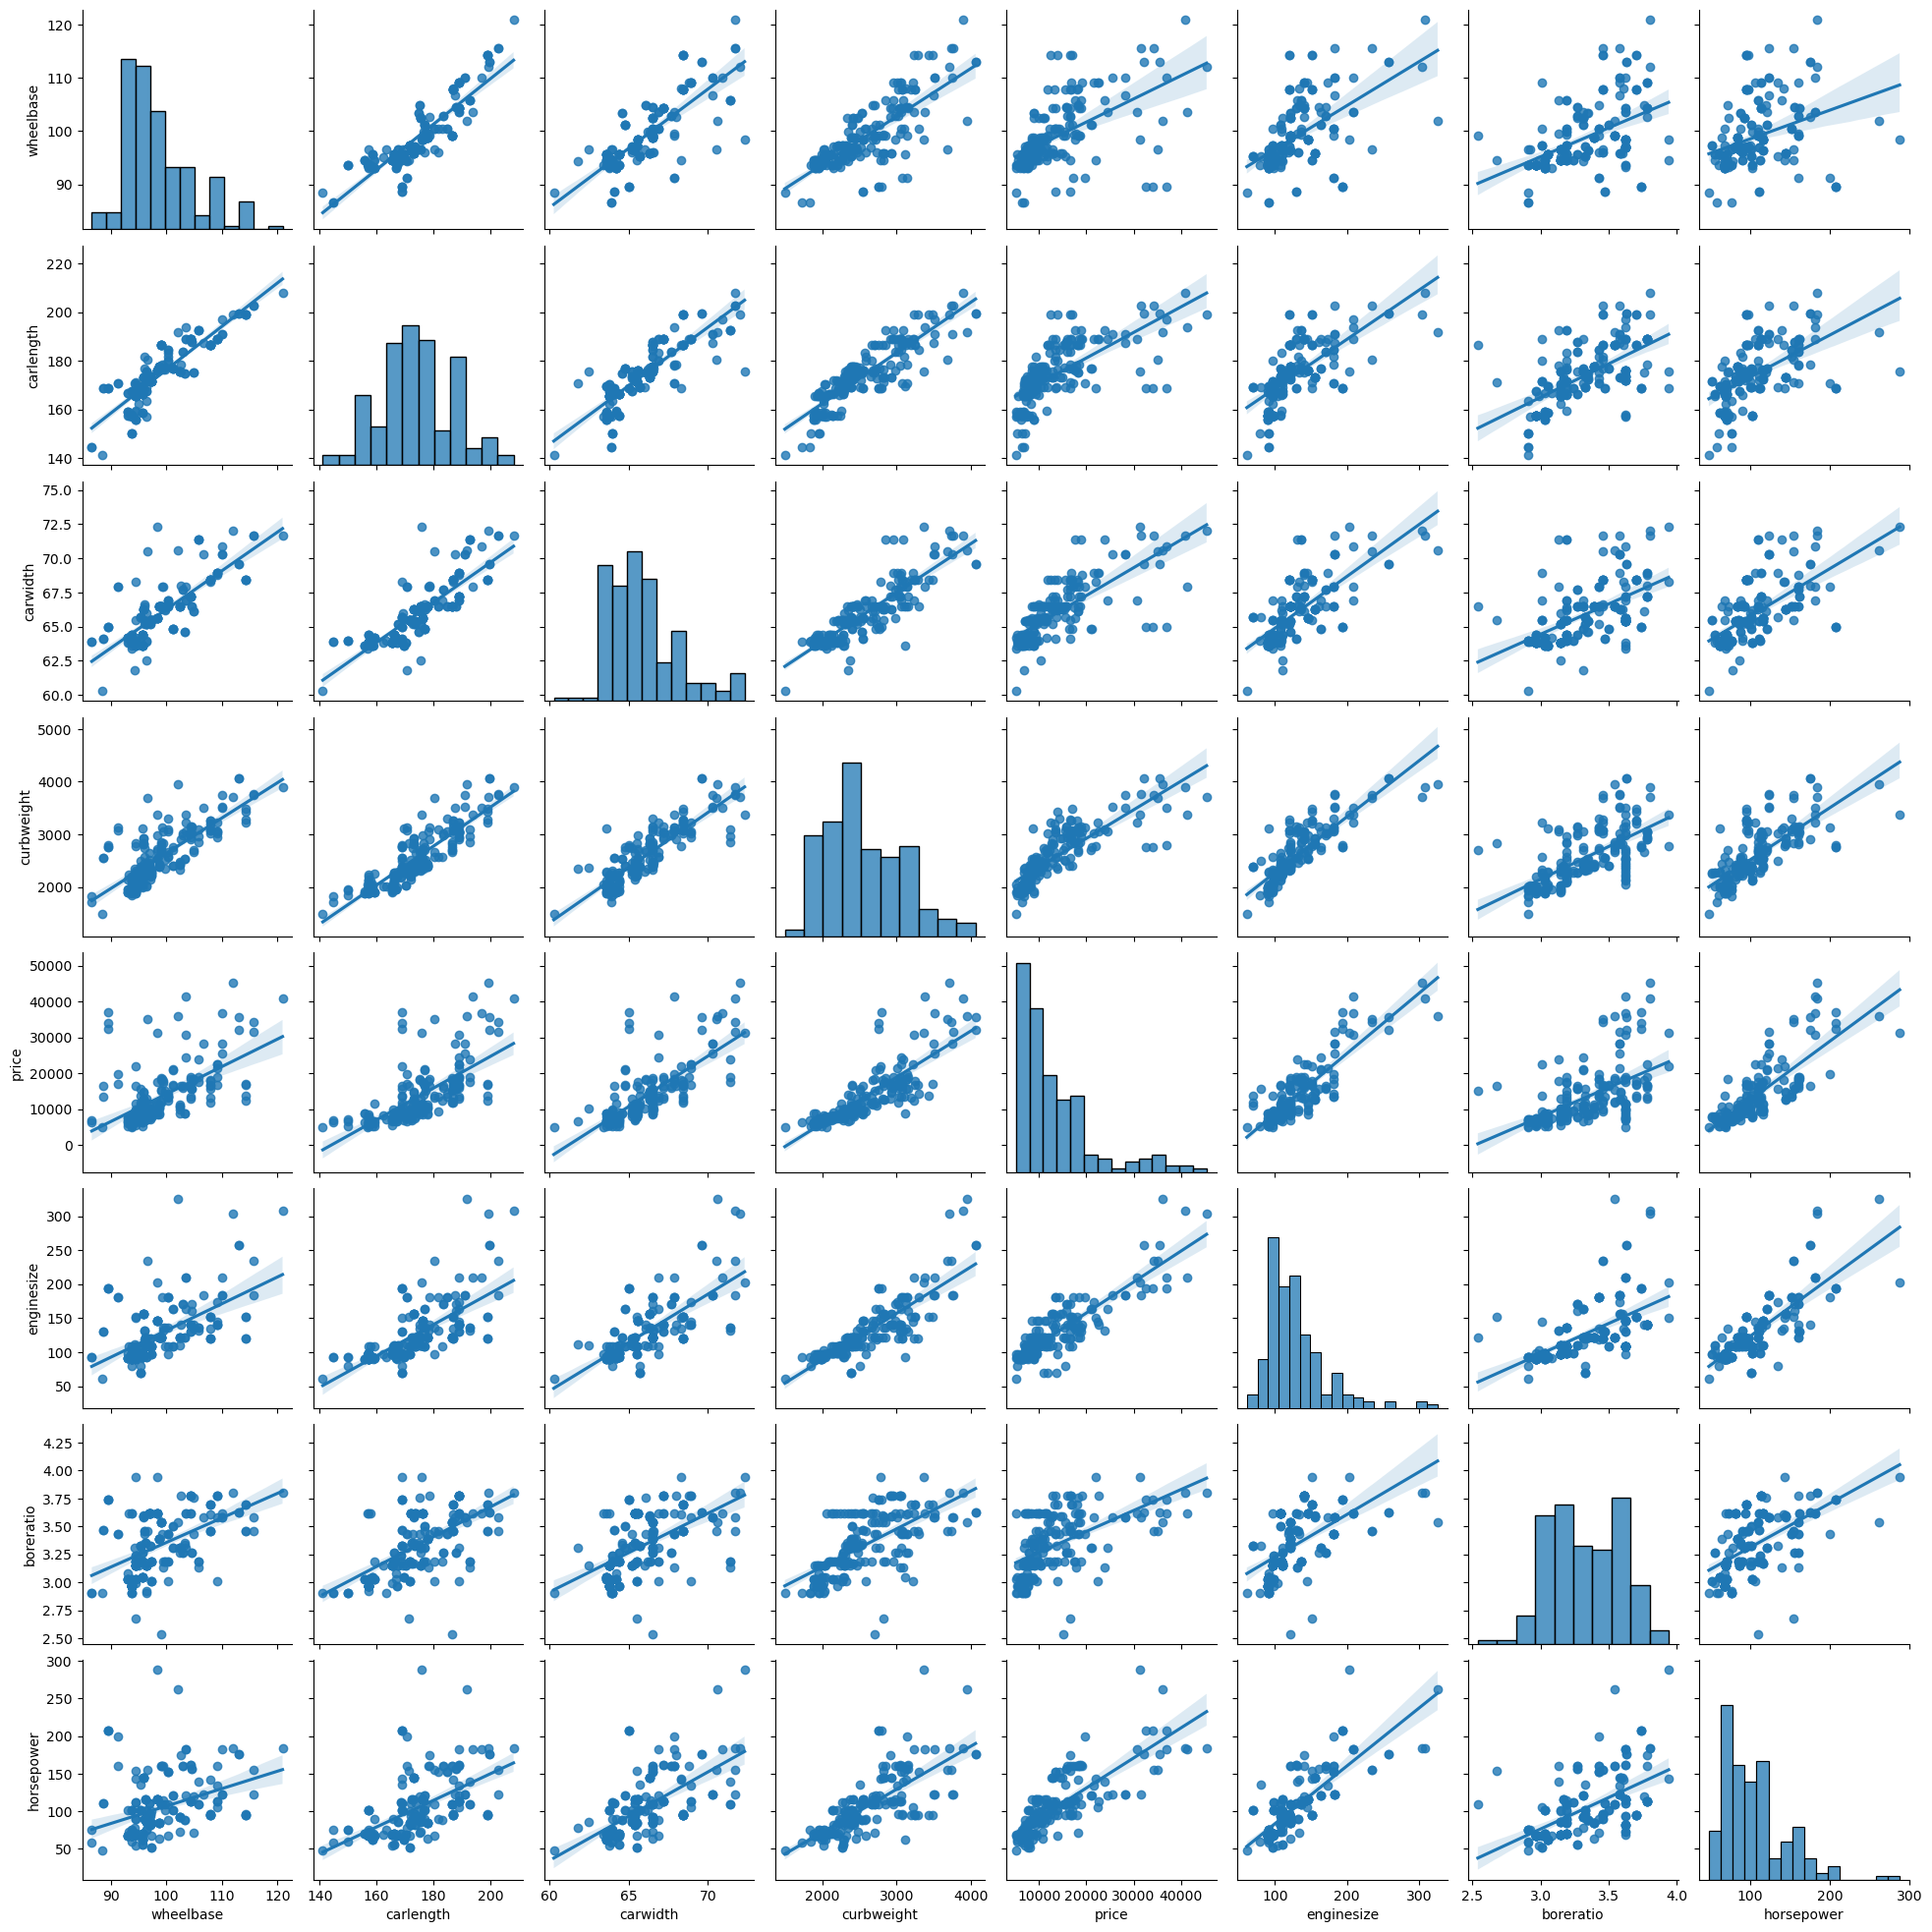

In [21]:
sns.pairplot(cars, kind = 'reg')

Данные распределены не нормально

<Figure size 1000x500 with 0 Axes>

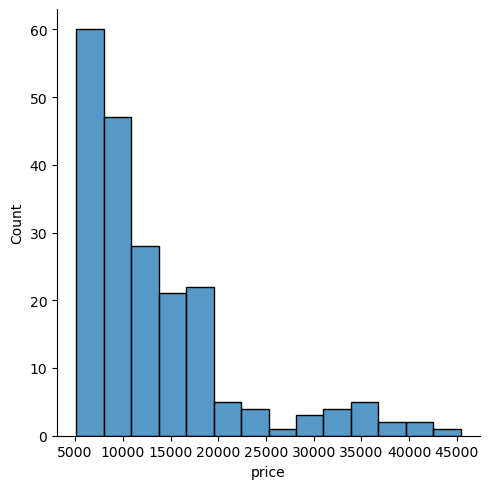

In [44]:
plt.figure(figsize=(20,10), dpi=50)
sns.displot(data=cars, x='price')
plt.show()

Тест, показывающий еще и p-value

In [45]:
st.spearmanr(cars.curbweight, cars.price)

SpearmanrResult(correlation=0.9090666905857352, pvalue=4.0026112686216925e-79)

In [46]:
st.spearmanr(cars.horsepower, cars.price)

SpearmanrResult(correlation=0.8546096111609128, pvalue=1.0967646925749507e-59)

## 4) Преобразуйте категориальные переменные с помощью pd.get_dummies().

In [95]:
cars.dtypes

company            object
fueltype           object
aspiration         object
carbody            object
drivewheel         object
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
price             float64
enginetype         object
cylindernumber     object
enginesize          int64
boreratio         float64
horsepower          int64
dtype: object

Линейная регрессия в python не справляется с категориальными переменными (типом object в pandas),  
поэтому давайте применим функцию под названием pd.get_dummies(). Она создаёт т.н. фиктивные переменные на основе  
изначальных категорий, представленные в виде 0 и 1.

In [49]:
cars_dummy = pd.get_dummies(data=cars[['company', 'fueltype', 'aspiration','carbody', 'drivewheel', \
                                       'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', \
                                       'cylindernumber', 'enginesize', 'boreratio','horsepower', 'price']], \
                                        drop_first = True)

In [50]:
cars_dummy.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [52]:
cars_dummy.dtypes

wheelbase                float64
carlength                float64
carwidth                 float64
curbweight                 int64
enginesize                 int64
boreratio                float64
horsepower                 int64
price                    float64
company_audi               uint8
company_bmw                uint8
company_buick              uint8
company_chevrolet          uint8
company_dodge              uint8
company_honda              uint8
company_isuzu              uint8
company_jaguar             uint8
company_mazda              uint8
company_mercury            uint8
company_mitsubishi         uint8
company_nissan             uint8
company_peugeot            uint8
company_plymouth           uint8
company_porsche            uint8
company_renault            uint8
company_saab               uint8
company_subaru             uint8
company_toyota             uint8
company_volkswagen         uint8
company_volvo              uint8
fueltype_gas               uint8
aspiration

## 5) Постройте модель с одним предиктором цены – horsepower. Какой процент изменчивости объясняет полученная модель? ((R^2))

Проводим линейный регрессионный анализ для одной Н. Видим, что наша модель объясняет 65% изменчивости данных

In [53]:
results = smf.ols('price ~ horsepower', data=cars).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           1.48e-48
Time:                        09:19:48   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

## 6) Далее – две модели (со всеми предикторами и со всеми, кроме марок машин). Обратите внимание на изменения в (R^2), коэффициентах и их значимости. Какую модель лучше оставить?

Проводим линейный регрессионный анализ для всех НП. Видим, что 95% изменчивости данных объясняется нашей моделью. Если R-squared очень велико, то RSS (сумма квадратов остатков) очень мала, что означает минимальные расстояния от точек до нашей регресионной прямой.

In [54]:
Y = cars['price']  # dependent variable
X = cars_dummy.drop(columns='price') # predictors
X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
results1 = model.fit()  # строим регрессионную прямую
print(results1.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           4.86e-89
Time:                        09:44:05   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.472e+

Посмотрим на модель с теми же предикторами, но уже без марок машин

In [55]:
cars_no_company_dummy = pd.get_dummies(data=cars[['fueltype', 'aspiration','carbody', 'drivewheel', \
                                       'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', \
                                       'cylindernumber', 'enginesize', 'boreratio','horsepower', 'price']], \
                                        drop_first = True)

Проводим линейный регрессионный анализ для всех НП кроме company

Видим, что модель стала хуже, так как R-squared уменьшился, соответственно сумма квадратов остатков увеличилась.
Большинство коэффициентов, связанных с марками машин, статистически незначимы. Если судить чисто по диагностическим показателям (вроде R2), то модель со всеми предикторами лучшая.

In [59]:
Y = cars['price']
X = cars_no_company_dummy.drop(columns='price')
results = smf.ols('Y ~ X', data=cars_no_company_dummy).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           9.86e-81
Time:                        09:49:21   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -1.7e+04    1.3e+04     -1.309      0.1